In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# ensure you're in the project root
os.chdir(r"C:\Users\Richard Wang\regime_classifier")

sns.set(style="whitegrid", context="talk")

ROOT = Path.cwd()
data_path = ROOT / "data" / "processed" / "features_with_clusters.csv"
model_path = ROOT / "models" / "hmm_model.pkl"

df = pd.read_csv(data_path, index_col=0, parse_dates=True)
model_data = joblib.load(model_path)
mapping = model_data["mapping"]

print("✅ Data loaded:", df.shape, "rows")
print("Columns:", df.columns.tolist())
print("Mapping:", mapping)


✅ Data loaded: (787, 14) rows
Columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'ret_1d', 'ret_5d', 'ret_21d', 'vol_5d', 'vol_21d', 'vol_z', 'VIX', 'cluster', 'regime']
Mapping: {np.float64(1.0): 'Bull', np.float64(0.0): 'Bear', np.float64(2.0): 'High-Vol'}


In [2]:
# The clustering step in hmm_regimes.py created a 'cluster' column.
# If it’s missing (depending on how you saved features), reload it here.

if "cluster" not in df.columns:
    print("No cluster column found — ensure you saved labeled features in hmm_regimes.py")
else:
    df["regime"] = df["cluster"].map(mapping)
    print(df["regime"].value_counts())
    df.head()


regime
Bull        353
High-Vol    262
Bear        172
Name: count, dtype: int64


ret_1d                    ret_5d                   vol_21d  \
              mean       std count      mean       std count      mean   
regime                                                                   
Bear      0.000556  0.012431   172  0.001010  0.026561   172  0.011901   
Bull      0.000723  0.003481   353  0.003229  0.008283   353  0.004904   
High-Vol  0.000162  0.008082   262  0.002259  0.015448   262  0.006671   

                          
               std count  
regime                    
Bear      0.003273   172  
Bull      0.001488   353  
High-Vol  0.002041   262

C:\Users\Richard Wang\AppData\Local\Temp\ipykernel_5012\1404642758.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="regime", y="ret_1d", data=df, estimator=np.mean, ci=None, palette="Set2")
C:\Users\Richard Wang\AppData\Local\Temp\ipykernel_5012\1404642758.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="regime", y="ret_1d", data=df, estimator=np.mean, ci=None, palette="Set2")


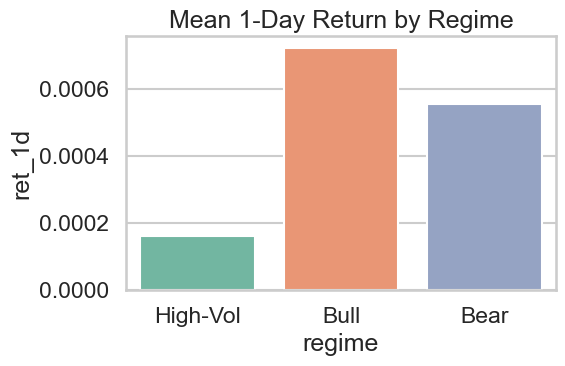

In [3]:
# Calculate descriptive stats
summary = df.groupby("regime")[["ret_1d","ret_5d","vol_21d"]].agg(["mean","std","count"])
display(summary)

# Barplot of mean daily return by regime
plt.figure(figsize=(6,4))
sns.barplot(x="regime", y="ret_1d", data=df, estimator=np.mean, ci=None, palette="Set2")
plt.title("Mean 1-Day Return by Regime")
plt.tight_layout()
plt.savefig("figs/mean_return_by_regime.png", dpi=200)
plt.show()


C:\Users\Richard Wang\AppData\Local\Temp\ipykernel_5012\1994952089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="regime", y="ret_1d", data=df, palette="Set2")


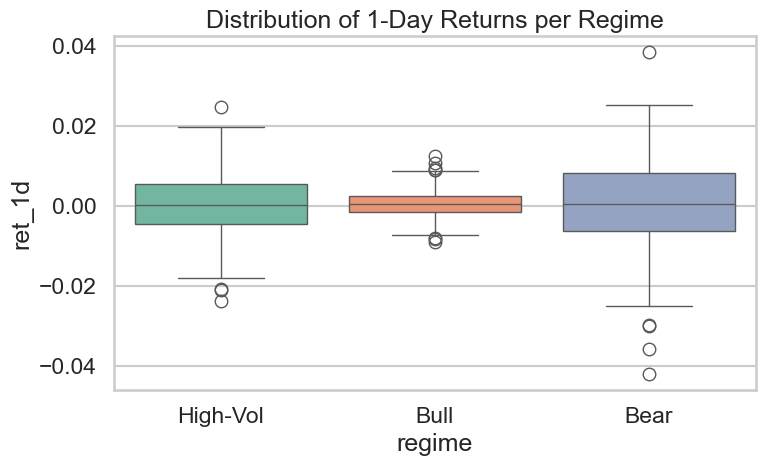

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(x="regime", y="ret_1d", data=df, palette="Set2")
plt.title("Distribution of 1-Day Returns per Regime")
plt.tight_layout()
plt.savefig("figs/return_dist_by_regime.png", dpi=200)
plt.show()


C:\Users\Richard Wang\AppData\Local\Temp\ipykernel_5012\2311466451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="regime", y="vol_21d", data=df, palette="Set1")


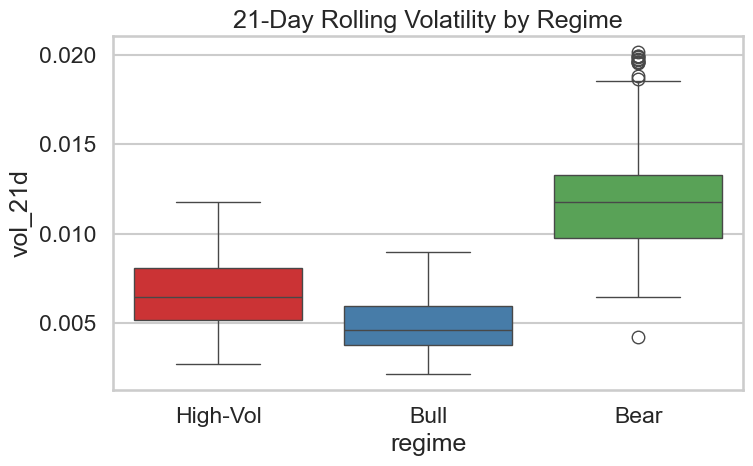

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x="regime", y="vol_21d", data=df, palette="Set1")
plt.title("21-Day Rolling Volatility by Regime")
plt.tight_layout()
plt.savefig("figs/volatility_by_regime.png", dpi=200)
plt.show()


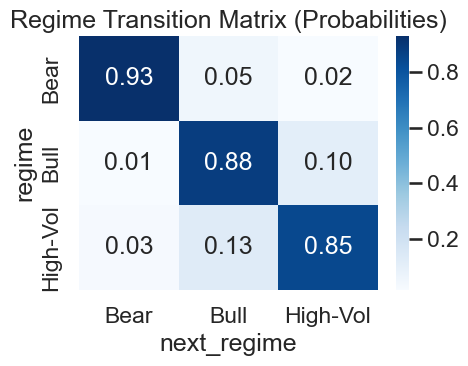

In [6]:
# compute transition frequencies
df["next_regime"] = df["regime"].shift(-1)
transitions = pd.crosstab(df["regime"], df["next_regime"], normalize=0)

plt.figure(figsize=(5,4))
sns.heatmap(transitions, annot=True, fmt=".2f", cmap="Blues")
plt.title("Regime Transition Matrix (Probabilities)")
plt.tight_layout()
plt.savefig("figs/transition_matrix.png", dpi=200)
plt.show()


In [7]:
df.to_csv("data/processed/features_with_regimes.csv")
print("✅ Saved features_with_regimes.csv for next steps")


✅ Saved features_with_regimes.csv for next steps


In [8]:
print(df.columns.tolist())
df.head()


['Close', 'High', 'Low', 'Open', 'Volume', 'ret_1d', 'ret_5d', 'ret_21d', 'vol_5d', 'vol_21d', 'vol_z', 'VIX', 'cluster', 'regime', 'next_regime']


,Close,High,Low,Open,Volume,ret_1d,ret_5d,ret_21d,vol_5d,vol_21d,vol_z,VIX,cluster,regime,next_regime
Price,,,,,,,,,,,,,,,
2014-12-04,172.001648,172.506902,171.206489,171.902245,91316600.0,-0.001107,0.000096,0.032775,0.005261,0.003270,0.473819,28447.699219,2,High-Vol,High-Vol
2014-12-05,172.283295,172.672590,171.910569,172.175614,91025500.0,0.001637,0.003861,0.027973,0.005144,0.003083,0.460994,26056.500000,2,High-Vol,High-Vol
2014-12-08,171.131912,172.382618,170.568672,171.885654,108588200.0,-0.006683,0.004131,0.017032,0.005045,0.003475,1.348583,23582.800781,2,High-Vol,High-Vol
2014-12-09,171.015976,171.123657,168.895569,169.276573,125180100.0,-0.000677,-0.002994,0.015393,0.003943,0.003490,1.902841,21274.000000,2,High-Vol,High-Vol
2014-12-10,168.274353,170.610110,168.083838,170.552136,159856400.0,-0.016031,-0.022753,-0.004020,0.007098,0.005006,2.656889,19295.000000,2,High-Vol,High-Vol
